In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from threeML import *
import numpy as np
from threeML.plugins import *
from skylab.datasets import Datasets
from astropy import units as u
from imp import reload
import scipy.optimize
import mla.core
import mla.injection
import mla.spectral
import warnings
import numpy.lib.recfunctions as rf
warnings.filterwarnings("ignore")
from skylab.ps_llh import PointSourceLLH
from skylab.llh_models import PowerLawLLH,EnergyLLH,ClassicLLH
from skylab.ps_injector import PointSourceInjector
import logging
skylab_logger = logging.getLogger('skylab')
skylab_logger.setLevel(logging.CRITICAL)

import os, sys, glob, abc

def read(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data



sample, season = 'GFU', 'IC86, 2011-2018'
d = Datasets[sample]
d.set_repository_path("/data/i3store/users/mjlarson/")

sinDec_bins = d.sinDec_bins(season)
energy_bins = d.energy_bins(season)
# Where is the dataset stored?
dataset = "/data/i3store/users/mjlarson/student_data"
exp, mc, livetime = d.season(season, compress=False)

# exp=rf.append_fields(exp.copy(),
#                            'sigma',
#                            exp['angErr'],
#                            dtypes=np.float32)
# mc=rf.append_fields(mc.copy(),
#                            'sigma',
#                            mc['angErr'],
#                            dtypes=np.float32)
# exp=rf.append_fields(exp.copy(),
#                            'sinDec',
#                            np.sin(exp['dec']),
#                            dtypes=np.float32)
# mc=rf.append_fields(mc.copy(),
#                            'sinDec',
#                            np.sin(mc['dec']),
#                            dtypes=np.float32)

In [7]:
ra=np.radians(83.63)
dec=np.radians(45)

In [8]:
inj = PointSourceInjector(gamma = 2., E0 = 1000.)
inj.fill(dec, exp, mc, livetime)

In [9]:

testskylab_model=EnergyLLH(twodim_bins=[energy_bins, sinDec_bins])
#testskylab_model=ClassicLLH()
testskylab=PointSourceLLH.upscale(exp,mc,(livetime,100),testskylab_model,seed=1)

In [10]:
#testskylab._exp = np.load("testdata.npy")
testskylab.fit_source(ra,dec)

(1.3063367410490585, {'nsignal': 5.276168264618686, 'gamma': 4.0})

In [11]:
in_ns=np.arange(5,101)
def injectns(inject_ns):
    result = []
    ns=inject_ns
    for i in range(100):
        ni,sample =  inj.sample(src_ra=ra, mean_signal=ns, poisson=False)
        sample['time']=1
        tempresult=testskylab.fit_source(ra,dec,inject=sample, scramble=True)
        result.append((inject_ns,tempresult[1]['gamma'],tempresult[1]['nsignal'],tempresult[0]))
    return np.array(result)

In [12]:
from multiprocessing import Pool
p=Pool(30)
warnings.filterwarnings("ignore")
allresult=p.map(injectns,in_ns)

allresult=np.array(allresult)
np.save("allresult_skylab_2.npy",allresult)
p.close()

In [13]:
gamma_list=[]
ts_list=[]
ns_list=[]
for i in range(allresult.shape[0]):
    ns_inject=allresult[i][0][0]
    gamma=allresult[i][:,1]
    ts=(-allresult[i][:,3])
    ns=allresult[i][:,2]
    gamma_list.append(np.array([gamma.mean(),gamma.std()]))
    ts_list.append(np.array([ts.mean(),ts.std()]))
    ns_list.append(np.array([ns.mean(),ts.std()]))

    
gamma_list=np.array(gamma_list)
ts_list=np.array(ts_list)
ns_list=np.array(ns_list)

In [14]:
inj = PointSourceInjector(gamma = 2.5, E0 = 1000.)
inj.fill(dec, exp, mc, livetime)
def injectns(inject_ns):
    result = []
    ns=inject_ns
    for i in range(100):
        ni,sample =  inj.sample(src_ra=ra, mean_signal=ns, poisson=False)
        sample['time']=1
        tempresult=testskylab.fit_source(ra,dec,inject=sample, scramble=True)
        result.append((inject_ns,tempresult[1]['gamma'],tempresult[1]['nsignal'],tempresult[0]))
    return np.array(result)
p=Pool(30)
allresult25=p.map(injectns,in_ns)
allresult25=np.array(allresult25)
np.save("allresult2.5_skylab_2.npy",allresult25)
p.close()


gamma_list25=[]
ts_list25=[]
ns_list25=[]
for i in range(allresult25.shape[0]):
    ns_inject=allresult25[i][0][0]
    gamma=allresult25[i][:,1]
    ts=(-allresult25[i][:,3])
    ns=allresult25[i][:,2]
    gamma_list25.append(np.array([gamma.mean(),gamma.std()]))
    ts_list25.append(np.array([ts.mean(),ts.std()]))
    ns_list25.append(np.array([ns.mean(),ts.std()]))

    
gamma_list25=np.array(gamma_list25)
ts_list25=np.array(ts_list25)
ns_list25=np.array(ns_list25)


inj = PointSourceInjector(gamma = 3., E0 = 1000.)
inj.fill(dec, exp, mc, livetime)
def injectns(inject_ns):
    result = []
    ns=inject_ns
    for i in range(100):
        ni,sample =  inj.sample(src_ra=ra, mean_signal=ns, poisson=False)
        sample['time']=1
        tempresult=testskylab.fit_source(ra,dec,inject=sample, scramble=True)
        result.append((inject_ns,tempresult[1]['gamma'],tempresult[1]['nsignal'],tempresult[0]))
    return np.array(result)
p=Pool(30)
allresult3=p.map(injectns,in_ns)
allresult3=np.array(allresult3)
np.save("allresult3_skylab_2.npy",allresult3)
p.close()


gamma_list3=[]
ts_list3=[]
ns_list3=[]
for i in range(allresult3.shape[0]):
    ns_inject=allresult3[i][0][0]
    gamma=allresult3[i][:,1]
    ts=(-allresult3[i][:,3])
    ns=allresult3[i][:,2]
    gamma_list3.append(np.array([gamma.mean(),gamma.std()]))
    ts_list3.append(np.array([ts.mean(),ts.std()]))
    ns_list3.append(np.array([ns.mean(),ts.std()]))

    
gamma_list3=np.array(gamma_list3)
ts_list3=np.array(ts_list3)
ns_list3=np.array(ns_list3)


In [15]:
-gamma_list[:,0]

array([-2.45764206, -2.40923133, -2.38365356, -2.36768062, -2.29915687,
       -2.31191717, -2.26237041, -2.24972527, -2.25836599, -2.23443237,
       -2.24117761, -2.25705464, -2.24244367, -2.22001921, -2.21566795,
       -2.21547187, -2.22203974, -2.21631835, -2.20209757, -2.19745951,
       -2.19890638, -2.18764274, -2.19843654, -2.18400412, -2.18046361,
       -2.18200084, -2.17373057, -2.16927775, -2.17233977, -2.16164941,
       -2.15705761, -2.1508576 , -2.1561908 , -2.15483795, -2.15559884,
       -2.15015185, -2.15099155, -2.15149123, -2.14968306, -2.15025078,
       -2.14363095, -2.14480254, -2.15613544, -2.14058407, -2.1410139 ,
       -2.14243427, -2.14577575, -2.14163116, -2.14216386, -2.14258723,
       -2.14437537, -2.13658743, -2.14024547, -2.14102222, -2.13652127,
       -2.13923981, -2.13903927, -2.1357746 , -2.13290543, -2.13438504,
       -2.13462912, -2.13753479, -2.13645695, -2.13425016, -2.13088441,
       -2.13284842, -2.12993023, -2.13330913, -2.12861542, -2.13

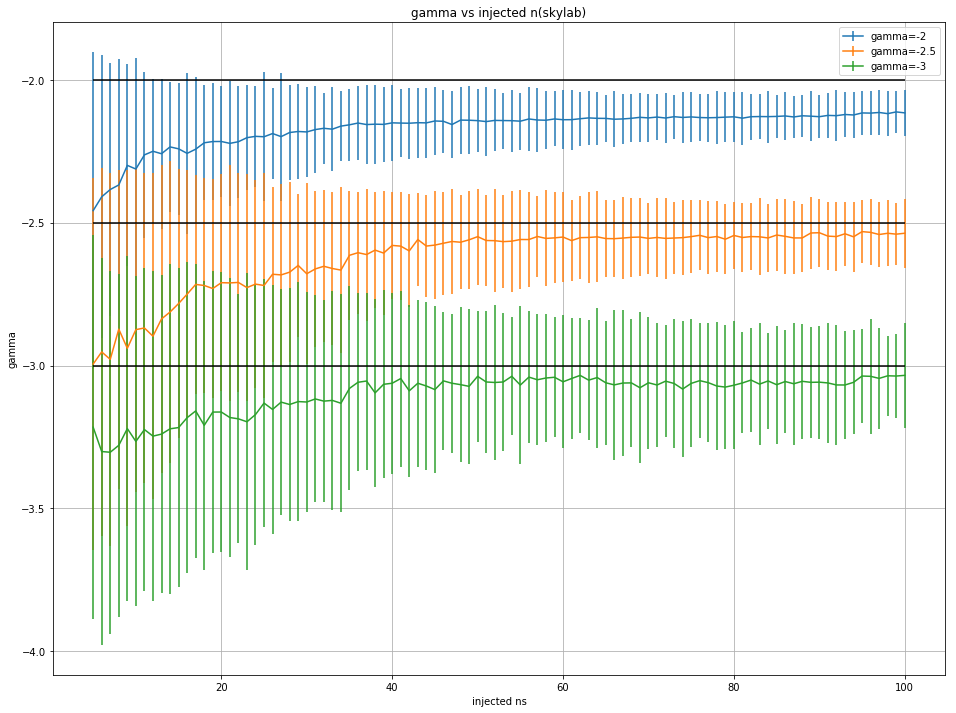

In [16]:
fig, ax = plt.subplots(figsize=(16,12))


ax.errorbar(in_ns, -gamma_list[:,0],
            yerr=gamma_list[:,1],
            fmt='-',label="gamma=-2")


ax.hlines(-2,5,100)
ax.errorbar(in_ns, -gamma_list25[:,0],
            yerr=gamma_list25[:,1],
            fmt='-',label="gamma=-2.5")
ax.hlines(-2.5,5,100)
ax.errorbar(in_ns, -gamma_list3[:,0],
            yerr=gamma_list3[:,1],
            fmt='-',label="gamma=-3")
ax.hlines(-3,5,100)
ax.set_xlabel("injected ns")
ax.set_ylabel("gamma")
ax.set_title("gamma vs injected n(skylab)")
ax.legend()
plt.grid()

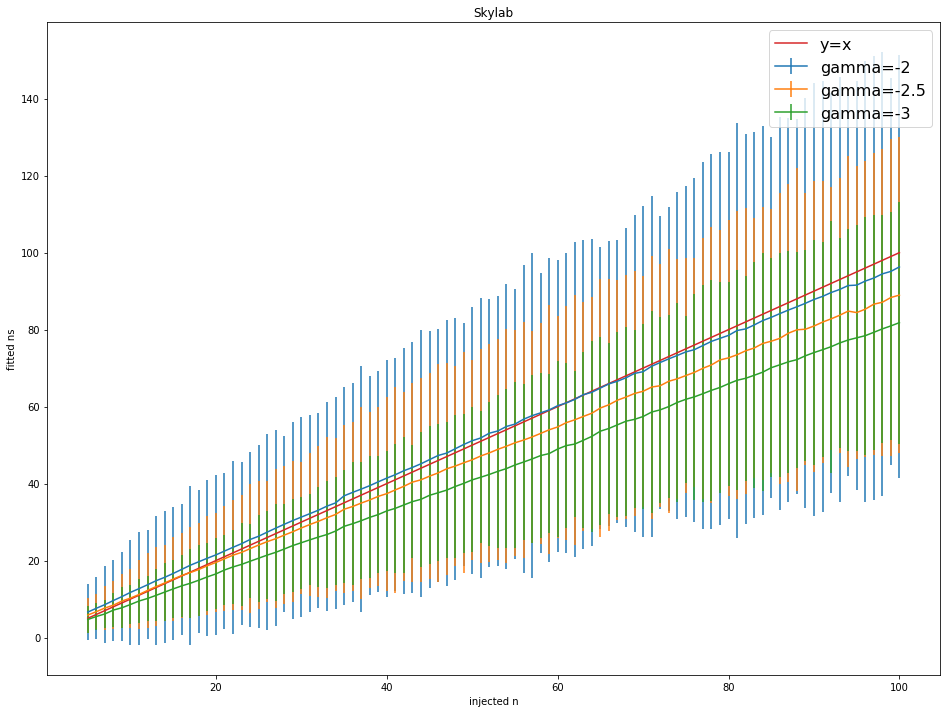

In [17]:
fig, ax = plt.subplots(figsize=(16,12))


ax.errorbar(in_ns, ns_list[:,0],
            yerr=ns_list[:,1],
            fmt='-',label="gamma=-2")
ax.errorbar(in_ns, ns_list25[:,0],
            yerr=ns_list25[:,1],
            fmt='-',label="gamma=-2.5")

ax.errorbar(in_ns, ns_list3[:,0],
            yerr=ns_list3[:,1],
            fmt='-',label="gamma=-3")
# ax.errorbar(in_ns, ns_list[:,0],
#             yerr=0,
#             fmt='-',label="gamma=-2")
# ax.errorbar(in_ns, ns_list25[:,0],
#             yerr=0,
#             fmt='-',label="gamma=-2.5")

# ax.errorbar(in_ns, ns_list3[:,0],
#             yerr=0,
#             fmt='-',label="gamma=-3")


x=np.linspace(5,100,1000)
ax.plot(x,x,label="y=x")
ax.set_xlabel("injected n")
ax.set_ylabel("fitted ns")
ax.set_title("Skylab")
ax.legend(fontsize=16)

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))

in_ns = np.linspace(1,40,100)

ax.errorbar(in_ns, ns_list[:,0],
            yerr=0,
            fmt='-',label="gamma=-2")
ax.errorbar(in_ns, ns_list25[:,0],
            yerr=0,
            fmt='-',label="gamma=-2.5")

ax.errorbar(in_ns, ns_list3[:,0],
            yerr=0,
            fmt='-',label="gamma=-3")


x=np.linspace(5,100,1000)
ax.plot(x,x,label="y=x")
ax.set_xlabel("injected n")
ax.set_ylabel("fitted ns")
ax.set_title("Skylab")
ax.legend(fontsize=16)